In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/dataset.json", lines= True)

In [ ]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
df.shape

(20001, 3)

**Data Processing**

In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

df

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0


In [ ]:
df.label.unique()

array(['1', '0'], dtype=object)

In [ ]:
df.extras.unique()

array([nan])

In [ ]:
df["notes"] = df.annotation.apply(lambda x: x.get('notes'))
df.notes.unique()

array([''], dtype=object)

In [ ]:
import nltk
nltk.download(['punkt', 'wordnet'])

import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

In [ ]:
df

,content,annotation,extras,label,notes
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1,
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1,
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1,
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1,
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1,
...,...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0,
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0,
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0,
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0,


**Droping the columns which are not necessary**

In [ ]:
df = df.drop(['annotation','extras','notes'],axis='columns')


In [ ]:
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
bully = df[df.label==1]
nonbully = df[df.label==0]

**Data Visualisation**

In [ ]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True


<Axes: xlabel='label'>

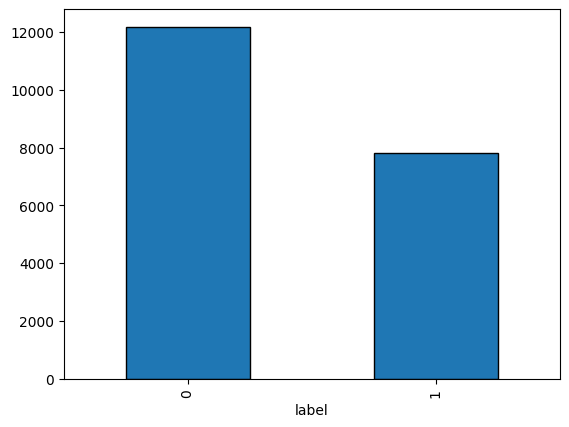

In [ ]:
df['label'].value_counts().sort_index().plot.bar()

**Bar Graph**

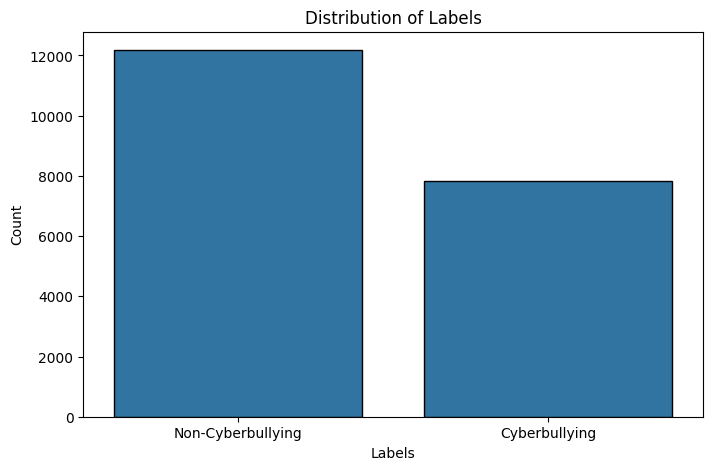

In [ ]:
# Count occurrences of each label

label_counts = df['label'].value_counts()

# Bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Cyberbullying', 'Cyberbullying'])
plt.show()

**Pie Chart**

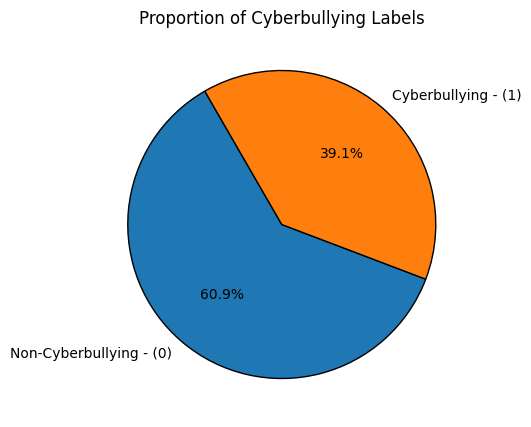

In [ ]:
plt.figure(figsize=(8, 5))
plt.pie(label_counts, labels=['Non-Cyberbullying - (0)', 'Cyberbullying - (1)'], startangle=120, autopct='%1.1f%%')
plt.title('Proportion of Cyberbullying Labels')
plt.show()


**Wordcloud**

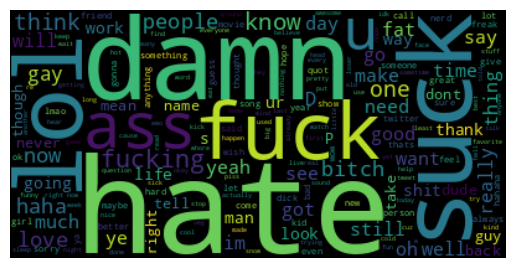

In [ ]:
text_data = ' '.join(df['content'])  # Replace 'text_column' with the actual text column name
wordcloud = WordCloud().generate(text_data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Frequency Distribution**

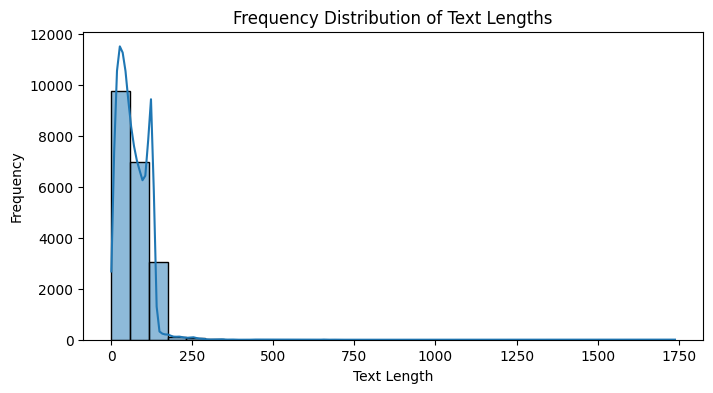

In [ ]:
# Create a new column for text length
df['text_length'] = df['content'].apply(len)  # Replace 'text_column' with the actual column name

# Frequency distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Frequency Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**Horizontal Word Count Distribution**

<ipython-input-25-f0879c2873af>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bow['Frequency'], y=bow.index, palette='pastel')


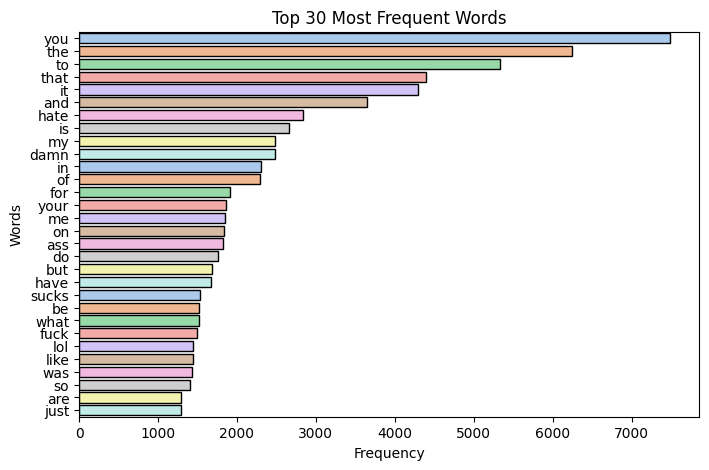

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Load your dataset from a JSON file
dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/dataset.json', lines=True)

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the content column
matrix = cv.fit_transform(dataset['content'])

# Create a DataFrame from the matrix
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

# Sum the words across all documents
df_sum = word_matrix.sum(axis=0)

# Get the top 30 most frequent words
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=['Frequency'])

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=bow['Frequency'], y=bow.index, palette='pastel')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words')
plt.show()


**Frequency Distribution of Word Count**

In [ ]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

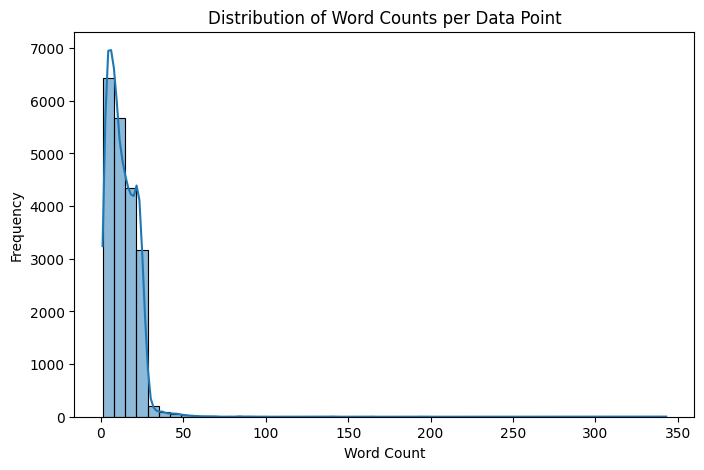

In [ ]:
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.histplot(df['word_count'], bins=50, kde=True)  # Adjust bins as needed
plt.title('Distribution of Word Counts per Data Point')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

**Heatmap**

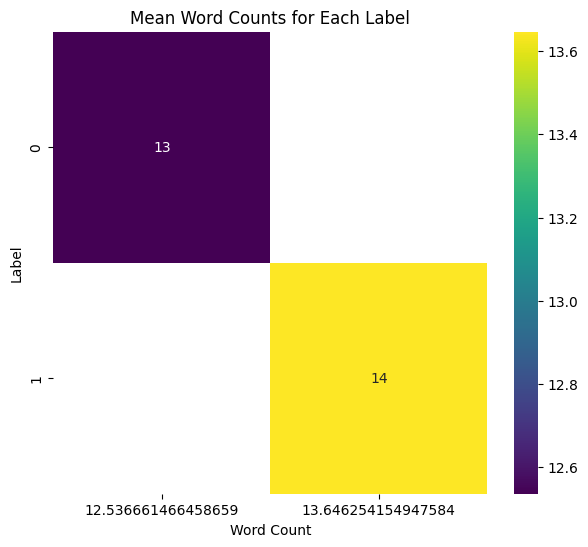

In [ ]:
# Calculate mean word counts for each label
mean_word_counts = df.groupby('label')['word_count'].mean().reset_index()

# Create heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(mean_word_counts.pivot(index='label', columns='word_count', values='word_count'), annot=True, cmap='viridis')
plt.title('Mean Word Counts for Each Label')
plt.xlabel('Word Count')
plt.ylabel('Label')
plt.show()

**Scatter Plot**

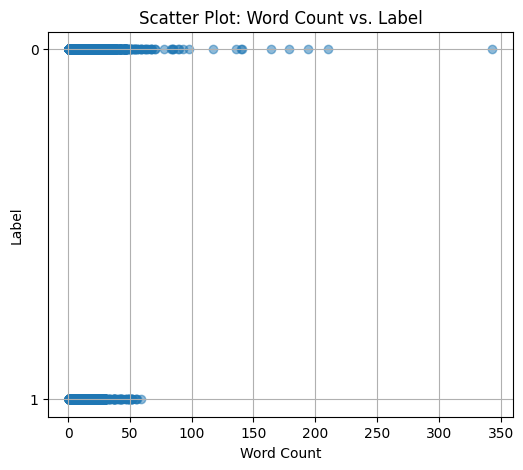

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(df['word_count'], df['label'], alpha=0.5)  # Adjust alpha for transparency
plt.title('Scatter Plot: Word Count vs. Label')
plt.xlabel('Word Count')
plt.ylabel('Label')
plt.grid(True)
plt.show()

In [ ]:
def load_data(path):
    df = pd.read_json(path, lines= True)

    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])

    X = df.content.values
    y = df.label.values

    return X, y

In [ ]:
def tokenize(text):

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


In [ ]:
tokenize("whoa stops you's stupid sjw")

['whoa', 'stop', 'you', "'s", 'stupid', 'sjw']

In [ ]:
vect = CountVectorizer(tokenizer=tokenize)
vect

CountVectorizer(tokenizer=<function tokenize at 0x7be42d3476d0>)

In [ ]:

url = '/dataset.json'
X, y = load_data(url)
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = df.iloc[:15000,0:1]
X_test = df.iloc[15000:,0:1]
y_train = df.iloc[:15000,1]
y_test = df.iloc[15000:,1]

In [ ]:
X_train.size

15000

In [ ]:
X_train

,content
0,Get fucking real dude.
1,She is as dirty as they come and that crook ...
2,why did you fuck it up. I could do it all day...
3,Dude they dont finish enclosing the fucking s...
4,WTF are you talking about Men? No men thats n...
...,...
14995,What can you smell right now?
14996,yew neva seen mi dik nd lol thankz
14997,whwhwhwhoa just slow down. huh!? what do you ...
14998,What&;s a subject you wish you knew more about?


In [ ]:
X_test.size

5001

In [ ]:
X_test

,content
15000,How often do you get sick?
15001,Wow awesome question....I think my best achi...
15002,Nahh hates a strong word.
15003,does anyone sang you a song on public? if so ...
15004,Nope.
...,...
19996,I dont. But what is complaining about it goi...
19997,Bahah yeah i&;m totally just gonna&; get pis...
19998,hahahahaha >:) im evil mwahahahahahahahahaha
19999,What&;s something unique about Ohio? :)


In [ ]:
20001-15000

5001

In [ ]:
y_train

,label
0,1
1,1
2,1
3,1
4,1
...,...
14995,0
14996,0
14997,0
14998,0


In [ ]:
y_train.head()

,label
0,1
1,1
2,1
3,1
4,1


In [ ]:
y_test.size

5001

In [ ]:
y_test.unique()

array(['0'], dtype=object)

**y_test had all labels 0's so we cannot test the trained model for label 1's**

**Making use of train_test_split() method helps in balanced spliting- in form of arrays**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train

array(['i hate that i know some french...and the french you used  was the french i know',
       ' If one song were to describe your life  what song would it be?',
       'NERD!', ..., 'then ur game sucks. no crue  not buying it.',
       '  haha ummm  6th grade. like the middle of the year but i only wore them sometimes cuz i only had one pair. now its all i wear since 7th',
       "wash yo' ass!"], dtype=object)

In [ ]:
X_train.size

15000

In [ ]:
X_test

array(["it's like gay people using the f word.  somehow  allowed.",
       'bitch please your gorgeous', ' WHUUT HAPPENEDD??', ...,
       "- i know  right!? it's lammmeee. except  i'd love her too.she's hot. and funny. you're right. i hate my life.",
       "I swear this hour is just fucking twiddling it's thumbs as it passes. Ughhh hurry!",
       'i couldnt agree more. HATE sandra lee!'], dtype=object)

In [ ]:
X_test.size

5001

In [ ]:
y_train

array(['1', '0', '1', ..., '1', '0', '1'], dtype=object)

In [ ]:
y_train.size

15000

In [ ]:
y_test

array(['1', '1', '0', ..., '0', '0', '1'], dtype=object)

In [ ]:
y_test.size

5001

In [ ]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

**DECISION TREE CLASSIFIER**

In [ ]:
url = '/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = DecisionTreeClassifier()

    # train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)

    # predict on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
#Score = clf.score((X_test_tfidf,y_test)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Labels: ['0' '1']
Confusion Matrix:
 [[2501  568]
 [ 140 1792]]
Accuracy: 0.8584283143371326
Score: 85.84283143371326


**LOGISTIC REGRESSION**

In [ ]:
url = '/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = LogisticRegression()

    # train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)

    # predict on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
#Score = clf.score((X_test_tfidf,y_test)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Labels: ['0' '1']
Confusion Matrix:
 [[2527  529]
 [ 725 1220]]
Accuracy: 0.749250149970006
Score: 74.9250149970006


**RANDOM FOREST CLASSIFIER**

In [ ]:
url = '/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = RandomForestClassifier()

    # train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)

    # predict on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
#Score = clf.score((X_test_tfidf,y_test)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Labels: ['0' '1']
Confusion Matrix:
 [[2975   85]
 [ 150 1791]]
Accuracy: 0.9530093981203759
Score: 95.30093981203758


**KNeighbors Classifier**

In [ ]:
url = '/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = KNeighborsClassifier()

    # train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)

    # predict on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
#Score = clf.score((X_test_tfidf,y_test)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Labels: ['0' '1']
Confusion Matrix:
 [[2255  812]
 [ 720 1214]]
Accuracy: 0.6936612677464508
Score: 69.36612677464508


In [ ]:
url = '/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = KNeighborsClassifier()

    # train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)

    # predict on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
#Score = clf.score((X_test_tfidf,y_test)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Labels: ['0' '1']
Confusion Matrix:
 [[2221  815]
 [ 700 1265]]
Accuracy: 0.6970605878824235
Score: 69.70605878824236


In [ ]:
url = '/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train

array(['Agreed!  Twitter showed the way with the whale ;)',
       'well I hate texting it every 5 sex',
       ' Do any of your friends have children?', ...,
       'ur right.......just managed to lock my phone and the fucking phone now asking me PUK code:(',
       'I think Bangladesh did "What\'s Your Fantasy"  and fuck what   anyone says  that song is a JAM...can\'t front on it...',
       'DEAD ASS?!?!?!?!?!'], dtype=object)

**NAIVE BAYES ALGO**

In [ ]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.

In [ ]:

# Converting string labels into numbers.
X_encoded=le.fit_transform(X_train)
print(X_encoded)

[ 4949 11155  2271 ... 11085  6463  5190]


In [ ]:
X_encoded.shape

(15000,)

In [ ]:
y_train

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

In [ ]:
y_train.shape

(15000,)

In [ ]:
Xt_encoded = le.fit_transform(X_test)
print(Xt_encoded)

[ 781 2637 4406 ... 4174 1212  777]


In [ ]:
y_test

array(['0', '0', '1', ..., '1', '0', '0'], dtype=object)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
X_encoded= X_encoded.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)
Xt_encoded= Xt_encoded.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
# Train the model using the training sets
model.fit(X_encoded,y_train)
y_pred = model.predict(Xt_encoded)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)

Labels: ['0']
Confusion Matrix:
 [[2999]]
Accuracy: 0.5996800639872025
Score: 59.968006398720256


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
def load_data(path):
    df = pd.read_json(path, lines= True)

    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])

    X = df.content.values
    y = df.label.values

    return X, y

def tokenize(text):

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    #print(clean_tokens)
    return clean_tokens

def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

def main():
    url = '/dataset.json'
    X, y = load_data(url)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    #initializing
    vect = CountVectorizer(tokenizer=tokenize)

    tfidf = TfidfTransformer()
    clf = RandomForestClassifier()

    # train classifier
    X_train_counts = vect.fit_transform(X_train)
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    clf.fit(X_train_tfidf, y_train)

    # predict on test data
    X_test_counts = vect.transform(X_test)
    X_test_tfidf = tfidf.transform(X_test_counts)
    y_pred = clf.predict(X_test_tfidf)

    # predict on test data
    X_test_counts = vect.transform(["whoa stop you stupid bitch sjw"])
    comment="whoa stop you stupid bitch sjw"
    print("Comment given: "+comment)
    print("Applying CountVectorizer on the given comment:")
    print(X_test_counts)
    X_test_tfidf = tfidf.transform(X_test_counts)
    print("Applying Tfidf after CountVectorizer:")
    print(X_test_tfidf)
    print("Results after applying RandomForest Algorithm")
    print("Given text: 'whoa stop you stupid bitch sjw' ")
    print("Prediction: {}\n".format(clf.predict(X_test_tfidf)))
    if(clf.predict(X_test_tfidf)=='1'):
      print("The comment that you had done now correlates to Bullying.Stop doing this!")
    display_results(y_test, y_pred)

main()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Comment given: whoa stop you stupid bitch sjw
Applying CountVectorizer on the given comment:
  (0, 1984)	1
  (0, 12098)	1
  (0, 12186)	1
  (0, 13897)	1
  (0, 14299)	1
Applying Tfidf after CountVectorizer:
  (0, 1984)	0.33546890617064246
  (0, 12098)	0.4542794578041627
  (0, 12186)	0.475869675979749
  (0, 13897)	0.6514150445649383
  (0, 14299)	0.1740611341087284
Results after applying RandomForest Algorithm
Given text: 'whoa stop you stupid bitch sjw' 
Prediction: ['1']

The comment that you had done now correlates to Bullying.Stop doing this!
Labels: ['0' '1']
Confusion Matrix:
 [[2931  125]
 [ 171 1774]]
Accuracy: 0.9408118376324736


In [ ]:
tfidf

TfidfTransformer()

In [ ]:
X_test_tfidf

<5001x14441 sparse matrix of type '<class 'numpy.float64'>'
	with 67990 stored elements in Compressed Sparse Row format>

In [ ]:
print(vect.vocabulary_)

{'they': 12713, "'re": 55, 'not': 9048, 'my': 8712, 'preference': 10025, 'but': 2453, 'the': 12677, 'app': 1296, 'is': 6915, 'so': 11721, 'damn': 3597, 'fast': 4849, 'and': 1185, 'thorough': 12754, 'that': 12671, 'i': 6529, 'let': 7664, 'it': 6937, 'slide': 11594, '.': 134, 'you': 14307, 'work': 14091, 'in': 6705, 'cape': 2581, 'cod': 3049, 'why': 13951, 'fuck': 5312, 'am': 1137, 'up': 13392, 'early': 4309, 'argh': 1349, 'stupid': 12199, 'cousin': 3348, '&': 4, 'brother': 2336, 'nooo': 9017, 'id': 6565, 'find': 4980, 'interesting': 6844, 'to': 12875, 'be': 1780, 'honest': 6366, 'hmmm': 6303, '...': 136, 'first': 5006, 'baby': 1613, 'timothy': 12843, ':': 745, ']': 766, 'are': 1339, 'hitting': 6296, 'on': 9258, 'me': 8237, 'now': 9070, 'too': 12921, '?': 763, 'maybe': 8211, 'do': 4040, 'need': 8830, 'comic': 3111, 'avatar': 1524, 'back': 1622, '!': 0, 'oh': 9199, 'what': 13869, 'a': 785, 'spoil': 11921, 'sport': 11935, 'pussy': 10252, 'go': 5623, 'out': 9374, 'cold': 3066, 'take': 12457

In [ ]:
X_train

array(['Agreed!  Twitter showed the way with the whale ;)',
       'well I hate texting it every 5 sex',
       ' Do any of your friends have children?', ...,
       'ur right.......just managed to lock my phone and the fucking phone now asking me PUK code:(',
       'I think Bangladesh did "What\'s Your Fantasy"  and fuck what   anyone says  that song is a JAM...can\'t front on it...',
       'DEAD ASS?!?!?!?!?!'], dtype=object)

In [ ]:
y_train

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

In [ ]:
X_train1=X_train.to_xarray

AttributeError: 'numpy.ndarray' object has no attribute 'to_xarray'

In [ ]:
X_train1

NameError: name 'X_train1' is not defined

In [ ]:
y_train1=y_train.to_xarray

In [ ]:
y_train1

<bound method NDFrame.to_xarray of 0        1
1        1
2        1
3        1
4        1
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: label, Length: 15000, dtype: object>

In [ ]:
import pandas as pd

def load_data(path):
    """
    Loads data from a JSON file, extracts features and labels, and returns them.

    Args:
        path (str): The path to the JSON file.

    Returns:
        tuple: A tuple containing the features (X) and labels (y).
    """
    df = pd.read_json(path, lines=True)  # Reads JSON data

    # Extracts labels from the 'annotation' column
    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])

    # Prepares features (X) and target (y)
    X = df.content.values
    y = df.label.values

    return X, y  # Returns features and labels

In [ ]:
import tensorflow.keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load and preprocess data
url = '/dataset.json'
X1, y1 = load_data(url)  # Assuming you have load_data function defined

# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X1)
X1_sequences = tokenizer.texts_to_sequences(X1)

# Pad sequences
max_length = 100  # Adjust as needed
X1_padded = pad_sequences(X1_sequences, maxlen=max_length, padding='post', truncating='post')

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_padded, y1, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X1_train, y1_train, epochs=10, batch_size=64, validation_data=(X1_test, y1_test))  # Adjust epochs and batch_size

# Evaluate model
_, accuracy = model.evaluate(X1_test, y1_test, verbose=0)
print('Accuracy: {}'.format(accuracy))

FileNotFoundError: File /dataset.json does not exist